# Outliers using Visualisation

Now we will work with the outliers. As we know outliers are the data which are abnormal and differ from the regular data. Z-score is used to find out the outliers. But we can also use visualisation to find out if there are outliers in our data or not. If, we want the specific data about the outliers, then we use the z score. We will look and both visualisation and z-score  meathod.

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [3]:
ds1 = pd.read_csv('pres_height.csv', index_col = 'order')
ds1.sample(5)

,name,height
order,,
35,John F. Kennedy,183
20,James A. Garfield,183
9,William Henry Harrison,173
23,Benjamin Harrison,168
31,Herbert Hoover,182


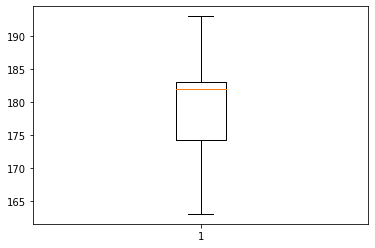

In [4]:
plt.boxplot(ds1['height'])
plt.show()

As we can see there are no outliers here. We now check another data

In [5]:
ds2 = pd.read_csv('hr_rate.csv')
ds2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


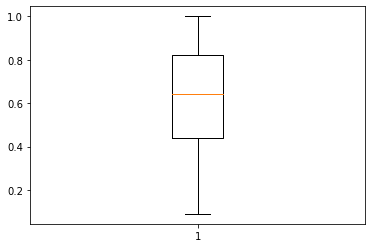

In [6]:
plt.boxplot(ds2['satisfaction_level'])
plt.show() # no outliers.

In [7]:
ds3 = pd.read_csv('titanic_fare.csv', index_col = 'PassengerId')
ds3.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


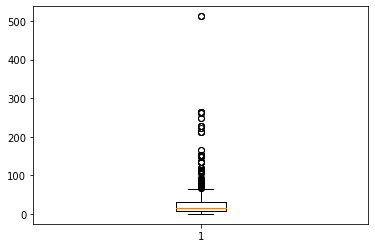

In [8]:
# Now we check the fare column of the above dataset.
plt.boxplot(ds3['Fare'])
plt.show()

As we can see here that there are some values or data which are more tahn they should be or max value, hence they are the outliers.

But using visualisation we can only find out that there are some outliers present in the dataset. To know there position in the dataset, we will use the z-score

# Discovering outliers using Mathematical functions or z-score.

We know that the z-score is used to find out the outliers in the data and any value which does not lie in the range of -3 < z-score < 3 are called the outliers. But when we have very large datasets, then it would be difficult to find first less than -3 and then greater than 3 to find out the outliers. So in order to reduce this hassale, we simply mod or convert all the negative z-score values to positive and then set a threshold of 3 so that any values above 3 are the outliers and we get to know there location. This conversion from negative to positive is done using the "abs" function from numpy library whose syntax is as follows:
            variable_name = numpy.abs(zscore(data_name)) where zscore function is imported from scipy.


In [9]:
#np.where?
from scipy.stats import zscore

In [10]:
z = zscore(ds3.Fare)
z # here dtype is octadecimal or int64

array([-5.02445171e-01,  7.86845294e-01, -4.88854258e-01,  4.20730236e-01,
       -4.86337422e-01, -4.78116429e-01,  3.95813561e-01, -2.24083121e-01,
       -4.24256141e-01, -4.29555021e-02, -3.12172378e-01, -1.13845709e-01,
       -4.86337422e-01, -1.87093118e-02, -4.90279793e-01, -3.26266659e-01,
       -6.19988892e-02, -3.86670720e-01, -2.85997284e-01, -5.02948539e-01,
       -1.24919787e-01, -3.86670720e-01, -4.86756223e-01,  6.63597416e-02,
       -2.24083121e-01, -1.64441595e-02, -5.02948539e-01,  4.64700108e+00,
       -4.89776426e-01, -4.89442190e-01, -9.02720170e-02,  2.30172882e+00,
       -4.92377828e-01, -4.37007438e-01,  1.00606170e+00,  3.98582080e-01,
       -5.02863973e-01, -4.86337422e-01, -2.85997284e-01, -4.22073541e-01,
       -4.57645492e-01, -2.25593223e-01, -4.89442190e-01,  1.88762532e-01,
       -4.89776426e-01, -4.86337422e-01, -3.36334002e-01, -4.92377828e-01,
       -2.11917743e-01, -2.90024222e-01,  1.50673744e-01, -4.91371093e-01,
        8.96496787e-01, -

In [12]:
z_abs = np.abs(z)
z_abs # here dtype is octadecimal or int64

array([5.02445171e-01, 7.86845294e-01, 4.88854258e-01, 4.20730236e-01,
       4.86337422e-01, 4.78116429e-01, 3.95813561e-01, 2.24083121e-01,
       4.24256141e-01, 4.29555021e-02, 3.12172378e-01, 1.13845709e-01,
       4.86337422e-01, 1.87093118e-02, 4.90279793e-01, 3.26266659e-01,
       6.19988892e-02, 3.86670720e-01, 2.85997284e-01, 5.02948539e-01,
       1.24919787e-01, 3.86670720e-01, 4.86756223e-01, 6.63597416e-02,
       2.24083121e-01, 1.64441595e-02, 5.02948539e-01, 4.64700108e+00,
       4.89776426e-01, 4.89442190e-01, 9.02720170e-02, 2.30172882e+00,
       4.92377828e-01, 4.37007438e-01, 1.00606170e+00, 3.98582080e-01,
       5.02863973e-01, 4.86337422e-01, 2.85997284e-01, 4.22073541e-01,
       4.57645492e-01, 2.25593223e-01, 4.89442190e-01, 1.88762532e-01,
       4.89776426e-01, 4.86337422e-01, 3.36334002e-01, 4.92377828e-01,
       2.11917743e-01, 2.90024222e-01, 1.50673744e-01, 4.91371093e-01,
       8.96496787e-01, 1.24919787e-01, 5.99510151e-01, 6.63597416e-02,
      

Now, as we can see it will be impossible to find out the outliers from the above given data table. So, now we use a threshold or the max value 3 to find out the outliers. For this, we use the where function from numpy, in which only those values will be passed which satisfy the condition provided which in this case is greater than 3. Following syntax is used:
    numpy.where(condition)

In [13]:
location = np.where(z_abs>3) # as we can see we now have the  position of all the outliers in the array which gives us location 
location                     # of outliers in the given dataset. We can put these values to find out the outliers.

(array([ 27,  88, 118, 258, 299, 311, 341, 377, 380, 438, 527, 557, 679,
        689, 700, 716, 730, 737, 742, 779], dtype=int64),)

In [38]:
z_abs[27] # as we see value is 4.64 which is greater than 3 so it is an outlier.

4.647001076532463

In [15]:
z_abs[716]

3.9327230485884233

We can use the location on ther original dataset to findout the original data which is an outlier.

In [16]:
ds3['Fare'][742] # given value in the dataset is an outlier.

78.85

# Discovering outliers using quantile or percetiles.

Outliers can also be found out using the quantiles. We know the Interquartile Range is the difference between 7percentile and 25 percentile. From the box plot we also know thata the outliers lie outside the box plot. The values between 25 percentile and min value in box plot is given by 1.5 * IQR. Similarly the value between 75 percentile and MAx value is also given by 1.5 * IQR. So the outliers will be less than Q1 - (1.5 * IQR) or more than Q3 + (1.5 * IQR). All the values which satisfy this condition will be outliers. So finding outliers using the quantiles as below:

In [20]:
Q1_ds3 = ds3['Fare'].quantile(0.25) # if we want 25 percentile, we write it as 0.25 in quantile function.
Q1_ds3 # below is the value of 25 percentile

7.9104

In [21]:
Q3_ds3 = ds3['Fare'].quantile(0.75) # if we want 25 percentile, we write it as 0.25 in quantile function.
Q3_ds3 # below is the value of 75 percentile

31.0

In [23]:
IQR = Q3_ds3 - Q1_ds3
IQR # below is the value of inter quartile range

23.0896

In [33]:
out = (( ds3['Fare'] < (Q1_ds3 - (1.5 * IQR)) ) | ( ds3['Fare'] > (Q3_ds3 + (1.5 * IQR)) ))
out # First part is where the values which are less than "(Q1_ds3 - (1.5 * IQR))" from the "ds3['Fare']" are outliers
   # Second part is where the values which are more than "(Q3_ds3 + (1.5 * IQR))" from the "ds3['Fare']" are outliers

PassengerId
1      False
2       True
3      False
4      False
5      False
       ...  
887    False
888    False
889    False
890    False
891    False
Name: Fare, Length: 891, dtype: bool

The values where we have True as the output are the outliers in the dataset.

In [36]:
location1 = np.where(out == True)
location1 # using numpy.where to find out the location of the outliers.
# asked doubt. We use both methods and select the one where less data is lost whiole removing the outliers

(array([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102, 118, 120, 124,
        139, 151, 159, 180, 195, 201, 215, 218, 224, 230, 245, 256, 257,
        258, 262, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307, 310,
        311, 318, 319, 324, 325, 332, 334, 336, 337, 341, 366, 369, 373,
        375, 377, 380, 385, 390, 393, 412, 435, 438, 445, 453, 484, 486,
        496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581,
        585, 587, 591, 609, 627, 641, 645, 655, 659, 660, 665, 679, 681,
        689, 698, 700, 708, 716, 730, 737, 741, 742, 745, 759, 763, 765,
        779, 789, 792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
       dtype=int64),)

# Removing the Outliers from dataset

Now we have to remove the outliers from the original dataset. For this we use simple slicing along with the condition. As shown in below code, first we select the dataset or the column with the outliers in them, then we only select the values whose absolute z-score is less than 3. then as a result we have the dataset which is normal and does not consist of any outliers.

Removing outliers using Z-Score method

In [45]:
ds3_new = ds3['Fare'][z_abs < 3] # selecting only values from "ds3['Fare']" whose "[z_abs < 3]"
ds3_new # we get the column without the outliers.

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 871, dtype: float64

In [42]:
ds3['Fare'].shape

(891,)

As we can see the original data with outliers had 891 rows, but after removing the outliers only 871 rows are left. So the 20 rows with outliers are removed from the dataset.

Removing outliers using quantile method.

In [47]:
ds3_new = ds3['Fare'][out == False]
ds3_new

PassengerId
1       7.2500
3       7.9250
4      53.1000
5       8.0500
6       8.4583
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 775, dtype: float64

In [49]:
ds3["Fare"].shape

(891,)

As we can see the original data with outliers had 891 rows, but after removing the outliers only 775 rows are left. So more than 100 rows with outliers are removed from the dataset.

Now we see that from the z-score approach, 20 rows we eliminated, but from quantile approach, more thatn 100 rows were eliminated. So, we always go with the approach in which the less rows are eliminated.